### Innomatics Hackathon

#### Importing Required Libraries

In [1]:
# Importing Libraries
# Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Machine Learning Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

#### Reading and Loading Data

In [2]:
# Data Reading and Loading
df = pd.read_csv(r'F:\Priya\Courses\Innomatics\dataframe_.csv')
df.head(10)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


In [3]:
# Shape of dataframe
df.shape

(1697, 2)

In [4]:
# Information about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


#### Data Cleaning and Handling

##### Checking Null Values

In [5]:
# Checking Null Values
df.isnull().sum()

input     1
output    1
dtype: int64

__OBSERVATION:__ There is one null value present in the dataframe

##### Handling Null Values

Since the dataframe has only Numerical columns either mean or median can be used for filling the missing/null values.

In [6]:
# Handling Missing/Null Values
df1 = df.fillna(df.median())

In [7]:
# Checking for Null Values again
df1.isnull().sum()

input     0
output    0
dtype: int64

__OBSERVATION:__ No null values are found

##### Handling Duplicate Values

In [8]:
# Checking Duplicate Values
df1.duplicated().sum()

606

##### Handling Outliers

We can check the presence of outliers by
1. Boxplots
2. Z-score
3. IQR

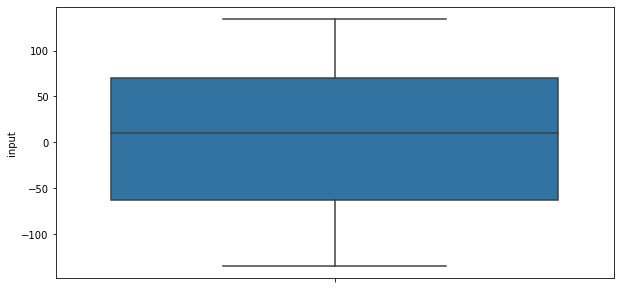

In [9]:
# Checking Outliers by using Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data = df1, y = 'input')
plt.show()

__OBSERVATION:__ No outliers are found in the input column in the dataframe. So no need for treating/removing outliers.

#### Model Building

In [10]:
# Model Building
X = df1.drop(columns = ['output'])
y = df1['output']

In [11]:
# train_test_split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)
print('Train dataset:', X_train.shape)
print('Test dataset:', X_test.shape)

Train dataset: (1187, 1)
Test dataset: (510, 1)


The output variable is continous numerical variable so it is linear regression problem

In [12]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
score = lm.score(X_test, y_test)
print(score)


0.18967261774280642
